<a href="https://colab.research.google.com/github/OsamaMustafa32/Plant-Disease-Detecttion-using-Deep-learning/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode='nearest')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1333 images belonging to 3 classes.


In [7]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 150 images belonging to 3 classes.


In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [15]:
optimizer=keras.optimizers.Adam(learning_rate=0.001)

In [16]:
cnn.compile(optimizer =optimizer , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 48)        13872     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 48)         0

In [ ]:
cnn.fit(training_set,validation_data=test_set,epochs=30)

Epoch 1/30
42/42 [==============================] - 615s 14s/step - loss: 1.0066 - accuracy: 0.4636 - val_loss: 0.8213 - val_accuracy: 0.5467
Epoch 2/30
42/42 [==============================] - 223s 5s/step - loss: 0.7350 - accuracy: 0.6519 - val_loss: 0.6673 - val_accuracy: 0.7200
Epoch 3/30
42/42 [==============================] - 228s 5s/step - loss: 0.6343 - accuracy: 0.7112 - val_loss: 0.7589 - val_accuracy: 0.6400
Epoch 4/30
42/42 [==============================] - 220s 5s/step - loss: 0.5718 - accuracy: 0.7607 - val_loss: 0.6733 - val_accuracy: 0.7267
Epoch 5/30
42/42 [==============================] - 217s 5s/step - loss: 0.4583 - accuracy: 0.8140 - val_loss: 0.5293 - val_accuracy: 0.8333
Epoch 6/30
42/42 [==============================] - 218s 5s/step - loss: 0.3289 - accuracy: 0.8755 - val_loss: 0.3250 - val_accuracy: 0.8867
Epoch 7/30
42/42 [==============================] - 217s 5s/step - loss: 0.2635 - accuracy: 0.9010 - val_loss: 0.2757 - val_accuracy: 0.8867
Epoch 8/30
4

In [ ]:
from tensorflow.keras.models import load_model
cnn.save("/content/drive/MyDrive/Dataset/trainedmodelCnn_plant.h5")

In [19]:
conv=tf.keras.models.load_model('/content/drive/MyDrive/Dataset/trainedmodelCnn_plant.h5')

1/1 [==============================] - 0s 31ms/step
Predicted condition:  Powdery


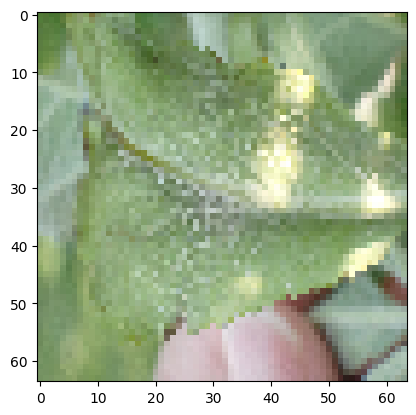

In [23]:
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
class_names = ['Healthy','Powdery','Rust']
def predictClass(filepath):
  img1 = image.load_img(filepath, target_size = (64,64))
  plt.imshow(img1)
  Y = image.img_to_array(img1, dtype=int)
  X = np.expand_dims(Y, axis=0)
  result = conv.predict(X)
  index = np.argmax(result)
  #print(index)
  print("Predicted condition: ", class_names[index])
predictClass("/content/drive/MyDrive/Dataset/Validation/Validation/Powdery/9b3648259a994f6d.jpg")
